##### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- feature : Length, Height, Width
- target : Weight
- 조건 : 
1) 특성 추가 : degree = 5
2) 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


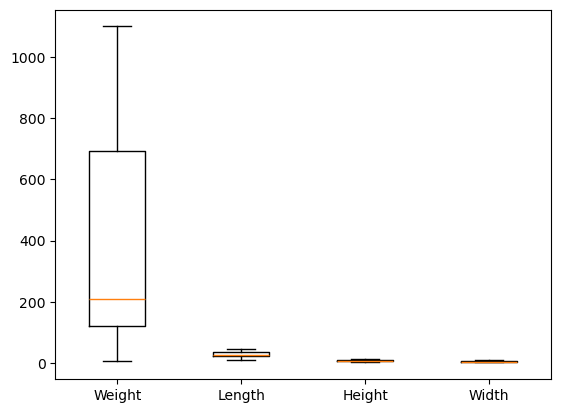

In [2]:
# 1. Load Data
dataDF = pd.read_csv("../../DATA/perch3.csv")

# 2. Data Preprocessing
dataDF.info()   # 1) no null, all float
dataDF.duplicated().sum()   # 2) 0

plt.boxplot(dataDF)
plt.xticks(range(1,5), dataDF.columns)
plt.show()  # Require standard scaler

In [3]:
# 2-1. Split
feature = dataDF.drop("Weight", axis=1)
target = dataDF["Weight"]

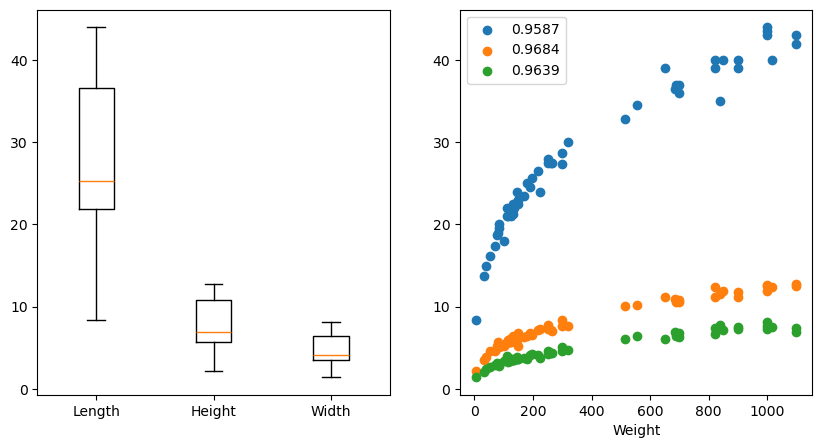

In [4]:
# 2-2. 데이터 분포 확인
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(feature)
plt.xticks(range(1,4), feature.columns)     # 이상치가 확인되진 않는다
plt.subplot(1,2,2)
plt.scatter(target, feature.Length, label=f'{target.corr(feature.Length):.4f}')
plt.scatter(target, feature.Height, label=f'{target.corr(feature.Height):.4f}')
plt.scatter(target, feature.Width, label=f'{target.corr(feature.Width):.4f}')
plt.xlabel("Weight")
plt.legend()
plt.show()

In [5]:
def print_scatter(nrows, ncols, targetSR, featureDF):

    n = 1
    for col in featureDF.columns:
        plt.subplot(nrows, ncols, n)
        plt.scatter(targetSR, featureDF[col], label=f'corr = {targetSR.corr(featureDF[col]):.4f}')
        plt.xlabel(targetSR.name)
        plt.title(f'{col}')
        plt.ylabel(col)
        plt.xticks([])
        plt.legend()
        n += 1
    plt.tight_layout()
    plt.show()

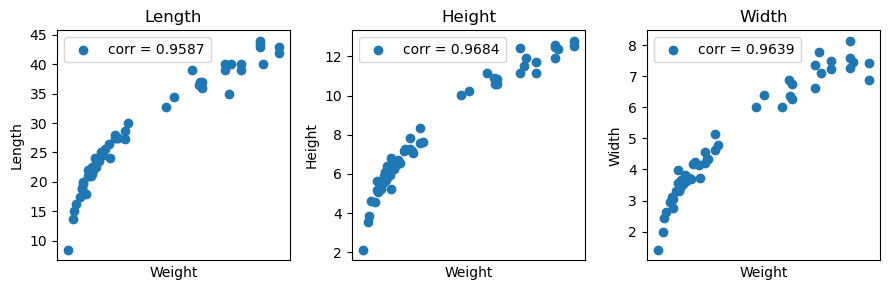

In [6]:
plt.figure(figsize=(9,3))
print_scatter(1,3,target,feature) 

In [7]:
# feature & target 관계

3. 데이터 가공  
3-1. 특성 추가

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
poly_feature = poly.fit_transform(feature)
poly_feature

array([[1.00000000e+00, 8.40000000e+00, 2.11200000e+00, ...,
        1.24507580e+01, 8.30050534e+00, 5.53367022e+00],
       [1.00000000e+00, 1.37000000e+01, 3.52800000e+00, ...,
        9.94548307e+01, 5.63577374e+01, 3.19360512e+01],
       [1.00000000e+00, 1.50000000e+01, 3.82400000e+00, ...,
        2.10342232e+02, 1.33774139e+02, 8.50781138e+01],
       ...,
       [1.00000000e+00, 4.30000000e+01, 1.25125000e+01, ...,
        6.38682746e+04, 3.78564682e+04, 2.24385612e+04],
       [1.00000000e+00, 4.35000000e+01, 1.26040000e+01, ...,
        8.57452524e+04, 5.53901813e+04, 3.57812485e+04],
       [1.00000000e+00, 4.40000000e+01, 1.24888000e+01, ...,
        6.83536932e+04, 4.15733283e+04, 2.52852706e+04]])

In [9]:
print(f'특성 추가 => {poly_feature.shape}\n{poly.feature_names_in_} => {poly.get_feature_names_out}')

특성 추가 => (56, 56)
['Length' 'Height' 'Width'] => <bound method PolynomialFeatures.get_feature_names_out of PolynomialFeatures(degree=5)>


3-2. 스케일링
- split

In [10]:
# 1. split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_feature, target, random_state=5)

In [11]:
print(f'[train] : {X_train.shape}, {y_train.shape}, [test] : {X_test.shape}, {y_test.shape}')

[train] : (42, 56), (42,), [test] : (14, 56), (14,)


In [12]:
# 2. scaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [13]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

4. 학습 진행 -> 회귀

In [14]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [15]:
# 점수 산출
train_score = lr_model.score(scaled_X_train, y_train)
test_score = lr_model.score(scaled_X_test, y_test)

print(f'[train] : {train_score}, [test] : {test_score}')

[train] : 1.0, [test] : -38.767867476846156


##### 규제 : 가중치값을 조절해 과대적합 문제 해결
1) Ridge
2) Lasso : 특정 피처의 가중치를 0으로 하여 차원 축소 부여

규제1) Ridge

In [16]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(max_iter=100)
ridge_model.fit(scaled_X_train, y_train)

Ridge(max_iter=100)

In [17]:
# 점수 산출
train_score_ridge = ridge_model.score(scaled_X_train, y_train)
test_score_ridge = ridge_model.score(scaled_X_test, y_test)

print(f'[Ridge Model] train score : {train_score_ridge}, test score : {test_score_ridge}')

[Ridge Model] train score : 0.9874355208005008, test score : 0.9914491207423652


In [18]:
# Model Parameter
print(f'[Ridge Model] coef : {ridge_model.coef_}')
print(f'[Ridge Model] intercept : {ridge_model.intercept_}')


[Ridge Model] coef : [ 0.00000000e+00  1.83176874e+00 -7.23677789e+00  1.03067055e+01
  1.57775249e+01  1.18446480e+01  1.67466597e+01  9.57952490e+00
  1.47797173e+01  2.48615142e+01  1.85163425e+01  1.67577526e+01
  1.46142404e+01  1.58382863e+01  1.38108100e+01  1.64490445e+01
  1.56379186e+01  1.39352928e+01  1.71480760e+01  2.50779150e+01
  1.42694832e+01  1.39921892e+01  6.23690826e+00  1.41806030e+01
  6.32646330e+00  2.93976268e+00  1.47629117e+01  7.00986521e+00
  3.97399179e+00  5.70584401e+00  1.56796396e+01  8.23737024e+00
  5.75159002e+00  8.24469917e+00  1.54675618e+01  5.86439125e+00
  6.81074624e+00 -5.88111799e+00  8.02129126e+00 -4.97701429e+00
 -1.36851639e+01  9.44134707e+00 -3.67900627e+00 -1.22792895e+01
 -1.61590708e+01  1.10232306e+01 -2.01766706e+00 -1.03096090e+01
 -1.36546600e+01 -1.21067571e+01  1.27255386e+01 -1.99919223e-02
 -7.79070771e+00 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01]
[Ridge Model] intercept : 365.6404761904762


##### 최적의 규제 강도 설정 값 찾기

In [19]:
alphas = [0.1, 1, 10, 20, 30]
ridge_score = [[],[]]

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_X_train, y_train)
    train_score = ridge_model.score(scaled_X_train, y_train)
    test_score = ridge_model.score(scaled_X_test, y_test)
    
    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)
    
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]
print(best_alpha)

1


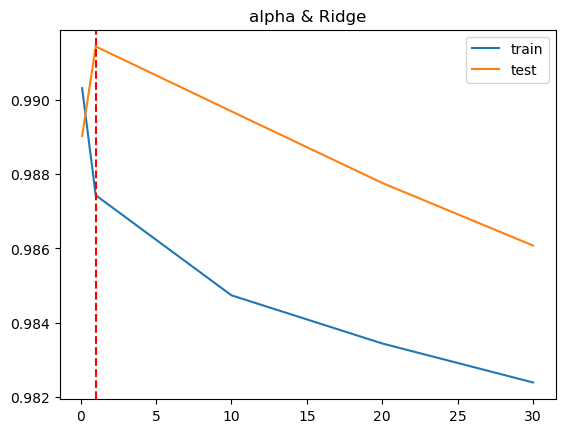

In [20]:
# 시각화
plt.plot(alphas, ridge_score[0], label='train')
plt.plot(alphas, ridge_score[1], label='test')
plt.axvline(best_alpha, linestyle='--', color='red')
plt.legend()
plt.title('alpha & Ridge')
plt.show()

[규제2] Lasso

In [21]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)

c:\Users\wjs31\.conda\envs\EXAM_MML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [22]:
# Model Parameters
print('[Lasso Model] n_iter :', lasso_model.n_iter_)
print(f'[Lasso Model] coef : {lasso_model.coef_}')
print(f'[Lasso Model] intercept : {lasso_model.intercept_}')


[Lasso Model] n_iter : 1000
[Lasso Model] coef : [ 0.          0.          0.          0.          8.39678696  0.
  0.         13.70952971  0.         87.23199451 91.06954235 16.61716411
  0.         35.69479723  0.          0.         46.93195311  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 41.8984421   0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.        ]
[Lasso Model] intercept : 365.6404761904762


In [23]:
alphas = [0.1, 1, 10, 20, 30]
lasso_score = [[],[]]

for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(scaled_X_train, y_train)
    train_score = lasso_model.score(scaled_X_train, y_train)
    test_score = lasso_model.score(scaled_X_test, y_test)
    
    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)
    
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]
print(best_alpha)

1


c:\Users\wjs31\.conda\envs\EXAM_MML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+04, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\wjs31\.conda\envs\EXAM_MML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\wjs31\.conda\envs\EXAM_MML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

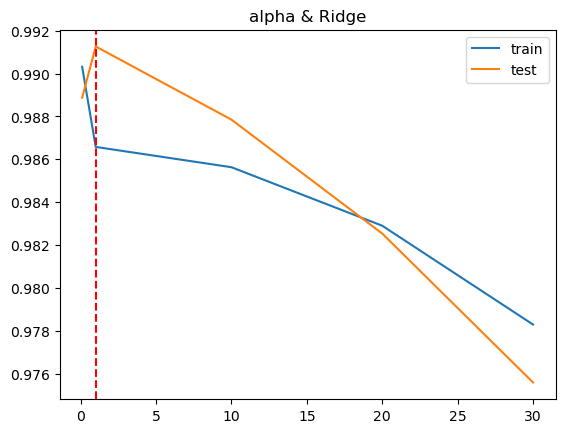

In [24]:
# 시각화
plt.plot(alphas, lasso_score[0], label="train")
plt.plot(alphas, lasso_score[1], label="test")
plt.axvline(best_alpha, linestyle="--", color="red")
plt.legend()
plt.title("alpha & Ridge")
plt.show()

In [25]:
# 왜 alpha가 30인가 했더니 random state 문제였음,,,
# fin.